In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy.signal as sp
import scipy.stats as st
import netCDF4 as nc
from cftime import num2date
import xarray as xr
import datetime as dt
import cartopy.crs as ccrs
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit, leastsq
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

In [35]:
#read file
fname='May2000-uvt.nc'
ds1=xr.open_dataset(fname)

Select a longitude λ corresponding to the tropical region between Indian Ocean and America

In [36]:
#Select a longitude λ corresponding to the tropical region between Indian Ocean and Americas
tropical_region = ds1.u.sel(level=250.0, longitude=170.0, method="nearest")

In [37]:
#select for between 15N and 15S
tropical_region_lat = tropical_region.sel(latitude=slice(15.0, -15.0))

In [38]:
#calculate the mean over entire latitude range
tropical_region_latmean = tropical_region_lat.mean(dim='latitude')

#compute a time-series u ̄(t) of 200mbar zonal wind, averaged between 15N and 15S.

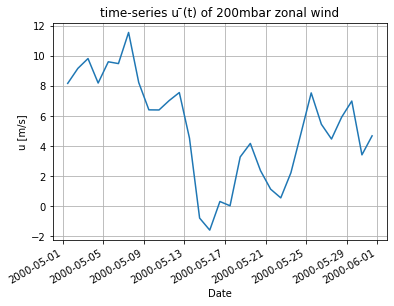

In [39]:
#compute a time-series u ̄(t) of 200mbar zonal wind, averaged between 15N and 15S.
plt.figure(1)
tropical_region_latmean.plot()
plt.title('time-series u ̄(t) of 200mbar zonal wind')
plt.grid()
plt.xlabel('Date')
plt.ylabel('u [m/s]')
plt.show()

Fit u ̄(t) with a sin function uˆ(t) = A + B sin(ωt + C). Plot the fitted function and the data

In [40]:
#set up the number of data points 
t = np.arange(1, 32)

In [ ]:
#curve fitting to predict time series
def sinfunc(A,B,C,D,t):
    return A + B * np.sin(C*t + D)
(a,b,c,d), pcov = curve_fit(sinfunc, t, Y, p0=(1,5,0.06,2))
pred = sinfunc(a, b, c, d, t)

In [41]:
#initial guesses and A is the offset

guess_mean = (np.mean(tropical_region_latmean)).values
guess_std = (3*np.std(tropical_region_latmean)/(2**0.5)/(2**0.5)).values
guess_phase = 0 #C
guess_freq = 1 #omega
guess_amp = 1 #B

print(guess_mean, guess_std)

5.194779 5.113652944564819


In [51]:
#making the guess better, fitting the sine curve


data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - tropical_region_latmean
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(1,32,0.1)
data_fit=est_amp*np.sin(est_freq*t+est_phase)+est_mean

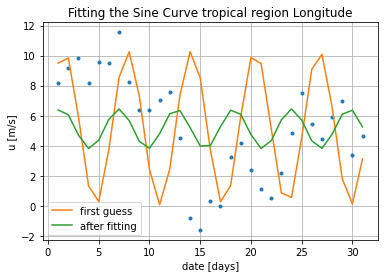

In [52]:
#creating the plots of the data, first guess, and sine curve fit

plt.plot(t, tropical_region_latmean, '.') 
plt.plot(t, data_first_guess, label='first guess')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.grid()
plt.xlabel('date [days]')
plt.ylabel('u [m/s]')
plt.title('Fitting the Sine Curve tropical region Longitude')

plt.show()

Compute R2 for the fit.

In [53]:
r2 = r2_score(tropical_region_latmean,data_fit)
r2

0.07518046431683323

In [54]:
tropical_region = ds1.u.sel(level=250.0, longitude=178.0, method="nearest")

In [55]:
#initial guesses
#A is the offset

guess_mean1 = (np.mean(tropical_region_latmean)).values
guess_std1 = (3*np.std(tropical_region_latmean)/(2**0.5)/(2**0.5)).values
guess_phase1 = 1 #C
guess_freq = 1 #omega
guess_amp1 = 2 #B

print(guess_mean1, guess_std1)

5.194779 5.113652944564819


In [56]:
#making the guess better, fitting the sine curve

data_first_guess1 = guess_std1*np.sin(t+guess_phase1) + guess_mean1
optimize_func1 = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - tropical_region_latmean
est_amp1, est_freq, est_phase1, est_mean1 = leastsq(optimize_func1, [guess_amp1, guess_freq, guess_phase1, guess_mean1])[0]
data_fit1 = est_amp1*np.sin(est_freq*t+est_phase1) + est_mean1
fine_t1 = np.arange(1,32,0.1)
data_fit1=est_amp1*np.sin(est_freq*t+est_phase1)+est_mean1

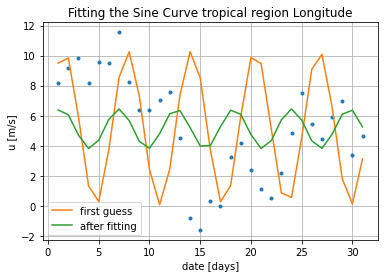

In [57]:
#creating the plots of the data, first guess, and sine curve fit

plt.plot(t, tropical_region_latmean, '.') 
plt.plot(t, data_first_guess, label='first guess')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.grid()
plt.xlabel('date [days]')
plt.ylabel('u [m/s]')
plt.title('Fitting the Sine Curve tropical region Longitude')

plt.show()

In [58]:
r12 = r2_score(tropical_region_latmean,data_fit1)
r12

0.07518046394193345